# Problem Statement

multiple linear regression model for the prediction of demand for shared bikes:

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes ?
How well those variables describe the bike demands ?

In [375]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [376]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("day.csv")  

### EDA

In [377]:
# Check top few records to get a feel of the data structure
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping Variables wichh doesn't help towards Model Prediction

 instanat can be dropped as it is just a row identifier
 
 we already have variables like year and month and weedkday, so we can drop dteday
 
 cnt is sum of casual and registered, hence they can be dropped

In [378]:
# drop the instant, dteday, casual, registered columns as they doesn't help towards model predictions
df = df.drop(['instant','dteday','casual','registered'], axis=1)

In [379]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


In [381]:
df.describe(include="all")

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


Through above Statistcal summary we can infer that data looks normal & no outliers, however we can confirm through visual analysis.

Also we can observe that there are few Categorical variables which are indicated with wrong datatype, we will ned to convert them accordingly. 

#### Missing Value Check

In [382]:
# Are there any missing values ?
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no missing values in the Dataset

#### Mapping values/labels to Categorical Variables

In [383]:
# finding Unique Values 

cv_cols = ['season','weathersit','mnth','weekday','yr','holiday','workingday']

for i in list(cv_cols):
    print(df[i].value_counts().sort_index())

1    180
2    184
3    188
4    178
Name: season, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
1     62
2     56
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64
0    105
1    105
2    104
3    103
4    104
5    104
6    105
Name: weekday, dtype: int64
0    365
1    365
Name: yr, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
0    231
1    499
Name: workingday, dtype: int64


In [384]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'clear_partly_cloudy',2:'mist_cloudy',3:'light_rainy'},inplace = True)

df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.5+ KB


In [386]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear_partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear_partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear_partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


#### Checking for Duplicates

In [387]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [388]:
df.shape

(730, 12)

### Visual Analysis

In [389]:
df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### Continuous Variable Visual Analysis

#### Outlier Check

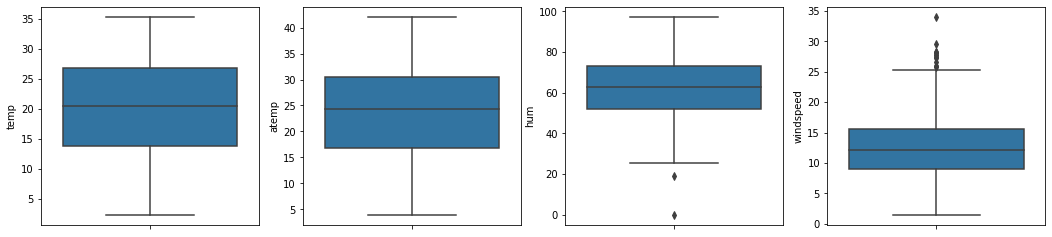

In [390]:
# boxplot for all continuous variables

cont_cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cont_cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

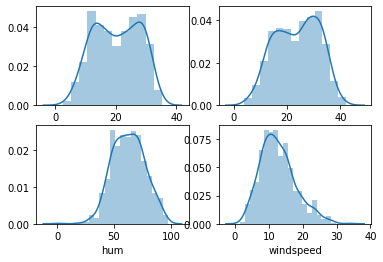

In [391]:
# distplot for all continuous variables

i = 1
for col in cont_cols:
    plt.subplot(2,2,i)
    sns.distplot(df[col])
    i+=1

From above plots we could infer that (as understood from descriptive stat summary) data distribution for continous variables seems normally distrbuted and not highly skewed as such no Outlier concern

<Figure size 1080x2160 with 0 Axes>

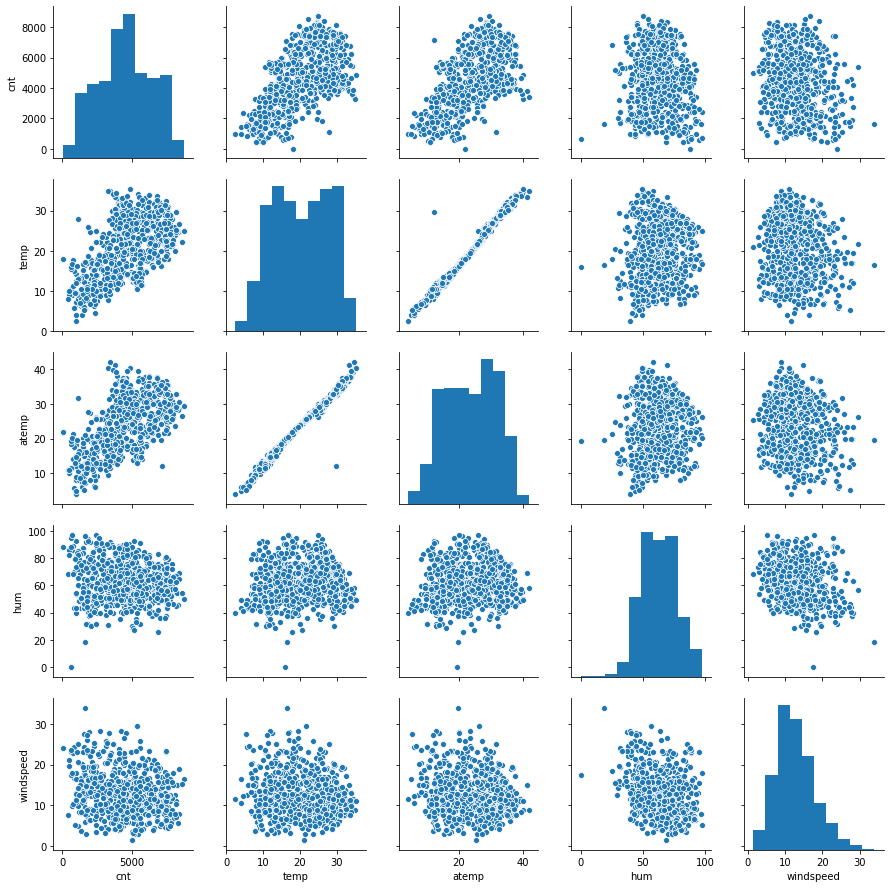

In [392]:
# Pairplots for continuous variables along with target variable to figure out if any Linearity

plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

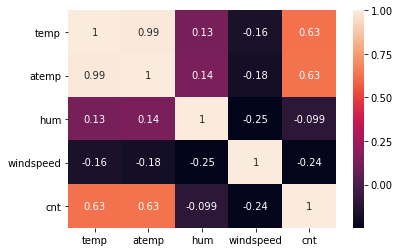

In [393]:
# Plot heat map to figure the strenght of Correlation

sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

From above plots, it looks like dependent variable cnt has strong positive correlation with temp/atemp variables and further temp and atemp has strong correlation and we may further drop one of them

Also, Target Variable Cnt seems to have negative correlation with hum and windspeed, indicating that the demand for bikes is low when weather is not favourable

#### Categorical Variable Visual analysis

In [394]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

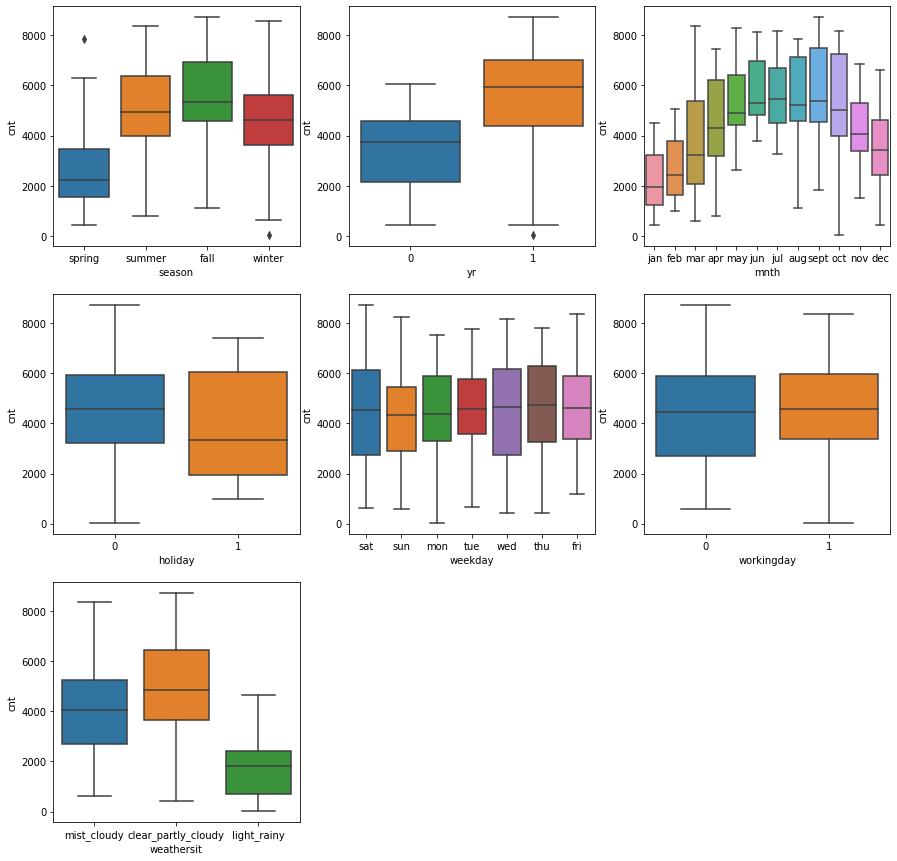

In [395]:
# Boxplot for categorical variables vs Target Variable

cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for index,col in enumerate(cat_cols):
    plt.subplot(3,3,index+1)
    sns.boxplot(data=df, x=col, y='cnt')
plt.show()

Based on the above plot, here are few inferences

demand for bikes seem to be higher duing fall followed by summer

from 2018 to 2019 demand for shared bikes on an average increased significantly

jun,july,aug,sep seems to be the target months with higher demand, while start and end of year seems to have low demand, may be due to weather conditions

any weekday or workingday on an average the demand trend remained similar

higher demand when the weather is clear and partly cloudy

#### Converting categorical to dummy variables for Model preparation

In [396]:
df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [397]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].unique())

SEASON :  ['spring' 'summer' 'fall' 'winter']
MNTH :  ['jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sept' 'oct' 'nov' 'dec']
WEEKDAY :  ['sat' 'sun' 'mon' 'tue' 'wed' 'thu' 'fri']
WEATHERSIT :  ['mist_cloudy' 'clear_partly_cloudy' 'light_rainy']


In [398]:
df = pd.get_dummies(data=df,columns=["mnth","weekday","season","weathersit"],drop_first=True)

In [399]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_light_rainy', 'weathersit_mist_cloudy'],
      dtype='object')

In [400]:
df.shape

(730, 30)

In [401]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_light_rainy,weathersit_mist_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,0,0,0


### Building Linear Model 

#### Split data into Train & Test

In [402]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling the Continous variables

In [403]:
#Use Normalized scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed']

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\Pytorch\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Pytorch\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_light_rainy,weathersit_mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,0,0,0,1,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,0,1,...,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,0,...,1,0,0,0,0,0,1,0,0,1


#### Dividing into X and Y sets for the model building

In [404]:
y_train = df_train.pop('cnt')
X_train = df_train

In [405]:
X_train.shape

(510, 29)

In [406]:
y_train.shape

(510,)

#### Building model using RFE approach (further we may use P-value & VIF to decide on the final model)

In [407]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [408]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\Pytorch\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [409]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 5),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('weathersit_light_rainy', True, 1),
 ('weathersit_mist_cloudy', True, 1)]

In [410]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'season_spring',
       'season_winter', 'weathersit_light_rainy', 'weathersit_mist_cloudy'],
      dtype='object')

In [411]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'season_summer'],
      dtype='object')

#### Model-1 -- Building model using statsmodel, for the detailed statistics using RFE selected variables

In [412]:
# Creating a dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

In [413]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\Pytorch\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [414]:
X_train_rfe.dtypes

const                     float64
yr                          int64
holiday                     int64
temp                      float64
atemp                     float64
hum                       float64
windspeed                 float64
mnth_dec                    uint8
mnth_jan                    uint8
mnth_jul                    uint8
mnth_nov                    uint8
mnth_sept                   uint8
season_spring               uint8
season_winter               uint8
weathersit_light_rainy      uint8
weathersit_mist_cloudy      uint8
dtype: object

In [415]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [416]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          8.86e-188
Time:                        22:51:38   Log-Likelihood:                -4114.5
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     494   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3194

In [417]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.57
3,temp,52.98
4,atemp,51.70
12,season_spring,2.75
13,season_winter,2.36
5,hum,1.91
10,mnth_nov,1.70
8,mnth_jan,1.65
15,weathersit_mist_cloudy,1.57
7,mnth_dec,1.45


##### As seen from the above output overall the model built using RFE selected features looks good fit which can explain 84% of variance in the Target variable

##### All the variables looks significant based on P-value analysis

##### Further all the variables has acceptable VIF values except temp and atemp , lets drop temp

##### However before concluding on the final model we will try out few more model combinations

#### Building models using manual selection ( will add/drop few vars to see if we can increase the predictive strength of the model)

In [418]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [419]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [420]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'season_spring', 'season_winter', 'weathersit_light_rainy',
       'weathersit_mist_cloudy'],
      dtype='object')

#### Model-2 (drop temp variable)

In [421]:
cols = ['yr', 'holiday','atemp', 'hum', 'windspeed',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'season_spring', 'season_winter', 'weathersit_light_rainy',
       'weathersit_mist_cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.58e-187
Time:                        22:51:38   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3241

C:\Users\Pytorch\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Model-3 (drop hum as it has high VIF)

In [422]:
cols = ['yr', 'holiday','atemp', 'windspeed',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'season_spring', 'season_winter', 'weathersit_light_rainy',
       'weathersit_mist_cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.95e-185
Time:                        22:51:39   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     496   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2569

C:\Users\Pytorch\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### after dropping temp and hum, it could be seen that the Model strenght remained almost same

##### however, now the VIF values are in acceptable range and P-values for all variables is significant

##### further Model is able to explain 83.2% variance and overall fit of the model is signifianct as well

##### we can go with model-3 as our final model for predictions

#### Building final model with variables selected thru RFE + Manual approach

In [423]:
cols = ['yr', 'holiday','atemp', 'windspeed',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'season_spring', 'season_winter', 'weathersit_light_rainy',
       'weathersit_mist_cloudy']

fin_LR = LinearRegression()
fin_LR.fit(X_train[cols],y_train)
print(fin_LR.intercept_,fin_LR.coef_)

2569.6202529632733 [ 2048.93594017  -765.61670348  3578.68234309 -1232.82703762
  -461.55993859  -488.65321927  -519.48086723  -435.15423482
   484.02688576  -952.67895712   504.54093102 -2530.93868109
  -710.5468694 ]


### Model Evaluation

### Residual Analysis of Train data

##### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [424]:
y_train_pred = fin_LR.predict(X_train[cols])
res = (y_train - y_train_pred)

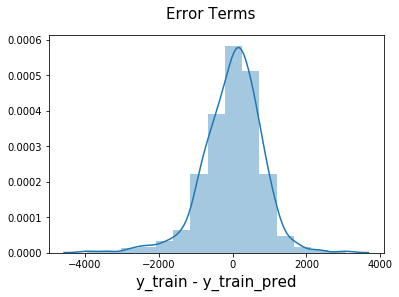

In [425]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals as seen from above graph are following normally distribution with a mean close to 0.

#### Looking for patterns in the residuals

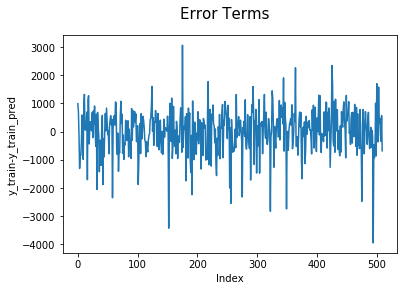

In [426]:
# look for patterns

# Error Terms
c = [i for i in range(0,len(X_train[cols]),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

We do not see any patterns and residuals scattered around y=0, as such error terms are independent of each other and has constant variance.

#### Actual vs Predicted (Train)

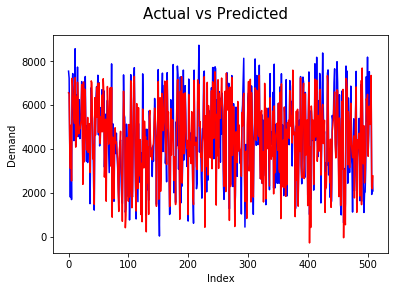

In [427]:
c = [i for i in range(0,len(X_train[cols]),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demand')
plt.show()

Actual vs Predicted graph shows good overlap of training vs predicted data which explains greater Predictive power of Model.

### Predictions on the Test Set

In [428]:
#Applying the scaling on the test sets
num_vars = ['temp','atemp','hum','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\Pytorch\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Pytorch\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [429]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [430]:
# Now let's use our model to make predictions.

cols = ['yr', 'holiday','atemp', 'windspeed',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept',
       'season_spring', 'season_winter', 'weathersit_light_rainy',
       'weathersit_mist_cloudy']

X_test[cols].columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'mnth_dec', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'season_spring', 'season_winter',
       'weathersit_light_rainy', 'weathersit_mist_cloudy'],
      dtype='object')

In [431]:
#Predict the values for test data

y_test_pred = fin_LR.predict(X_test[cols])

In [432]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Looking at the RMSE

In [433]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

808.206781844738

#### Checking the R-squared on the test set

In [434]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8179669424739715

### Conclusion


    Company should focus on expanding business during Winter.
    Company should focus on expanding business during September.
    Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
    There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

    Significant variables to predict the demand for shared bikes

    holiday
    atemp
    hum
    windspeed
    Season
    months(January, July, September, November, December)
    Year (2019)
    Sunday
    weathersit( Light Snow, Mist + Cloudy)
